In [19]:
#Make a timeseries that is easy to take slices out. So you can investigate little sections in more detail.
#Try making a dict

import pandas as pd
import numpy as np
from datetime import datetime

column_names=["year","month","day","hour","ws"]
dtype={"year":int,"month":int,"day":int,"hour":int,"ws":float}

datafile='/home/sophie/projects/windspeed/data/61401BirMoghrein_allwinds.txt'

#specify the columns you want to group together. Can't include hour at this point as it is not in the right format. 
date_spec = {'date_time': [0,1,2]}

#when you use keep_dat_col it keeps them as objects, not as the dtype you read them in as.
wind = pd.read_csv(datafile, sep=" ", names=column_names, parse_dates=date_spec, keep_date_col=True, index_col=False ) 

#Dealing with hour - going from 600, 1200 etc to 6,12, 18
wind["hour"]=(wind["hour"]/100).astype(int)

#combining year, month, day that were parsed together into date_time with hour, which is now in the correct format.
wind['date_time'] = pd.to_datetime(wind.date_time) + wind.hour.astype('timedelta64[h]')

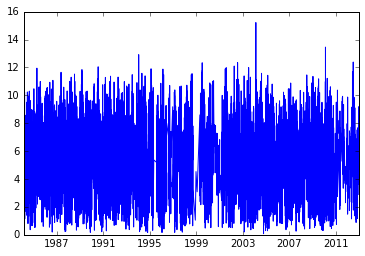

None


In [20]:
#Make sure it plots in the notebook
%matplotlib inline

import matplotlib.pyplot as plt     

plt.plot(wind['date_time'],wind['ws'])

print plt.show()

In [21]:
#do I need to change year, month and day into int arrays?
#These are 3 different ways to achieve the same thing....
wind['year']=wind['year'].astype('int64')
wind.month=wind.month.astype('int64')
wind.day=wind.day.astype(int)             
print wind.dtypes

#from the documentation you can specify what you want the subsection to consist of.
#Doesn't seem to work though...
values = {'year':['1984','2012']}
print values['year']


#You can create a boolean mask, then apply it to a column using .loc[mask]
#isin() compute a boolean array of whether each index meets the criteria
row_mask = wind['year'].isin([1985])
b = wind['year'] == 1984

date_time    datetime64[ns]
year                  int64
month                 int64
day                   int64
hour                  int64
ws                  float64
dtype: object
['1984', '2012']


In [22]:
#print the first 5 values from 'year' column which are 1985
wind['year'].loc[row_mask][0:5]
#you can store them in a new variable
check = wind['year'].loc[row_mask][0:5]
print check

#print the first 5 values from 'year' column which are 1984
print wind['year'].loc[b][0:5]

814    1985
815    1985
816    1985
817    1985
818    1985
Name: year, dtype: int64
0    1984
1    1984
2    1984
3    1984
4    1984
Name: year, dtype: int64


In [23]:
#print first 5 ws values from 1984
print wind['ws'].loc[b][0:5]

0    3.54349
1    1.86284
2    1.01765
3    2.29602
4    4.95783
Name: ws, dtype: float64


In [24]:
#can create a new dataframe with just out subsection
wind_1984= wind.loc[b]
print wind_1984[0:5]

            date_time  year  month  day  hour       ws
0 1984-03-01 06:00:00  1984      3    1     6  3.54349
1 1984-03-01 12:00:00  1984      3    1    12  1.86284
2 1984-03-01 18:00:00  1984      3    1    18  1.01765
3 1984-03-02 06:00:00  1984      3    2     6  2.29602
4 1984-03-02 12:00:00  1984      3    2    12  4.95783


In [25]:
# Can I select several things at once?
row_mask = wind['year'].isin([1985,1986])
#only really useful for one value
b = wind['year'] == 1986

print wind['year'].loc[b][-5:]

2588    1986
2589    1986
2590    1986
2591    1986
2592    1986
Name: year, dtype: int64


In [35]:
#So, using isin and loc[b] has potential.

year_alone = wind['year'] 
#print year_alone

#values = {year:[['1984','2012']]}

#the documentation says you need all() or any() to select the rows you want, but I don't think you do. 
row_mask = wind['year'].isin([1986,1984,2002])             


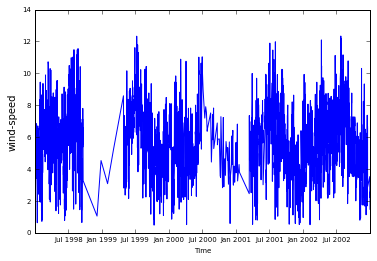

In [46]:
#Don't forget you can just put it straight into a new df
years_sub = wind[wind['year'].isin([1998,1999,2000,2001,2002])]

plt.plot(years_sub['date_time'],years_sub['ws'])

#labels
plt.xlabel("Time")
plt.ylabel("wind-speed", size=10)


#change size of x ticks
plt.rc("font", size=7)

plt.show()

                date_time  year  month  day  hour       ws
15052 1998-01-01 12:00:00  1998      1    1    12  9.37421
15053 1998-01-01 15:00:00  1998      1    1    15  9.21226
15137 1998-01-27 15:00:00  1998      1   27    15  8.35571
15141 1998-01-28 15:00:00  1998      1   28    15  9.45032
15162 1998-02-02 15:00:00  1998      2    2    15  8.65383


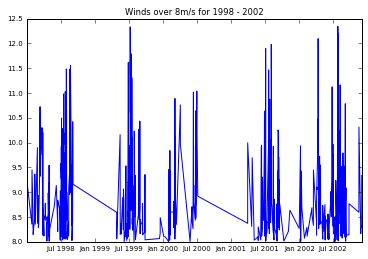

In [74]:
#Out of years_sub can we only have those wind-speeds over 8 m/s?
highwind_sub = years_sub[years_sub['ws'] > 8]
print highwind_sub[0:5]

plt.plot(highwind_sub['date_time'],highwind_sub['ws'])

plt.title('Winds over 8m/s for 1998 - 2002')

plt.show()

In [9]:
#only return the rows which meet the criteria
print wind[row_mask > 0][-5:]

#This is the same as 
print wind['ws'].loc[row_mask][-5:]

                date_time  year  month  day  hour       ws
19181 2002-12-18 18:00:00  2002     12   18    18  2.87475
19182 2002-12-30 09:00:00  2002     12   30     9  3.52768
19183 2002-12-30 18:00:00  2002     12   30    18  2.21256
19184 2002-12-31 15:00:00  2002     12   31    15  2.55376
19185 2002-12-31 18:00:00  2002     12   31    18  1.47591
19181    2.87475
19182    3.52768
19183    2.21256
19184    2.55376
19185    1.47591
Name: ws, dtype: float64


In [73]:
#how to make criteria across columns

#isin() can take a dictionary

#>>> df = DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'f']})
#>>> df.isin([1, 3, 12, 'a'])


#>>> df = DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'f']})
#>>> other = DataFrame({'A': [1, 3, 3, 2], 'B': ['e', 'f', 'f', 'e']})
#>>> df.isin(other)

###This doesn't work...
values_dic = {'year':[1999,2000,2001,2002], 'month':[4,3,2,1]}

values = pd.DataFrame(values_dic)

row_mask = wind.isin(values)

print wind[row_mask > 0][0:5]
#######not sure what it is doing

  date_time  year  month  day  hour  ws
0       NaT   NaN    NaN  NaN   NaN NaN
1       NaT   NaN    3.0  NaN   NaN NaN
2       NaT   NaN    NaN  NaN   NaN NaN
3       NaT   NaN    NaN  NaN   NaN NaN
4       NaT   NaN    NaN  NaN   NaN NaN


In [14]:
#trying the query() function

wind.query('year' > 1986 and 'year' < 1999, parser='python')


KeyError: False